In [2]:
import ccxt
import json
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pylab
from datetime import datetime
# import seaborn as sns
import pickle
print(ccxt.exchanges) # print a list of all available exchange classes

['_1broker', '_1btcxe', 'acx', 'anxpro', 'binance', 'bit2c', 'bitbay', 'bitcoincoid', 'bitfinex', 'bitfinex2', 'bitflyer', 'bithumb', 'bitlish', 'bitmarket', 'bitmex', 'bitso', 'bitstamp1', 'bitstamp', 'bittrex', 'bl3p', 'bleutrade', 'btcbox', 'btcchina', 'btcexchange', 'btcmarkets', 'btctradeua', 'btcturk', 'btcx', 'bter', 'bxinth', 'ccex', 'cex', 'chbtc', 'chilebit', 'coincheck', 'coinfloor', 'coingi', 'coinmarketcap', 'coinmate', 'coinsecure', 'coinspot', 'cryptopia', 'dsx', 'exmo', 'flowbtc', 'foxbit', 'fybse', 'fybsg', 'gatecoin', 'gdax', 'gemini', 'hitbtc', 'hitbtc2', 'huobi', 'huobicny', 'huobipro', 'independentreserve', 'itbit', 'jubi', 'kraken', 'lakebtc', 'livecoin', 'liqui', 'luno', 'mercado', 'mixcoins', 'nova', 'okcoincny', 'okcoinusd', 'okex', 'paymium', 'poloniex', 'quadrigacx', 'qryptos', 'quoine', 'southxchange', 'surbitcoin', 'tidex', 'therock', 'urdubit', 'vaultoro', 'vbtc', 'virwox', 'wex', 'xbtce', 'yobit', 'yunbi', 'zaif']


In [3]:
import csv

with open('../orderbook/XRP.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader)  # ヘッダーを読み飛ばしたい時
    xrp_list=list(reader)

df_xrp=pd.DataFrame(xrp_list, columns = ["id","exchange_name","pair_name","timestamp","best_ask","1","2","3","4","5","6","7","8","9","10","12_5","15","17_5","20"], dtype=float)

# df_xrp["exchange_name"].unique()

df_xrp_bittrex=df_xrp[df_xrp["exchange_name"] == "bittrex"]
df_xrp_bitfinex=df_xrp[df_xrp["exchange_name"] == "bitfinex"]


def get_dt_df(df):
    df["datetime"]=pd.to_datetime(df["timestamp"],unit='ms')
    df["hour"]=df["datetime"].dt.hour
    df["day"]=df["datetime"].dt.day
    df["month"]=df["datetime"].dt.month
    df["minute"]=df["datetime"].dt.minute
    df.index =  df["datetime"]
    return df

df_xrp_bittrex=get_dt_df(df_xrp_bittrex)
df_xrp_bitfinex=get_dt_df(df_xrp_bitfinex)

groupby_xrp_bittrex = df_xrp_bittrex.groupby(["month","day", "minute"])["best_ask"].mean() 
groupby_xrp_bitfinex = df_xrp_bitfinex.groupby(["month","day", "minute"])["best_ask"].mean()

diff = (groupby_xrp_bitfinex - groupby_xrp_bittrex)/groupby_xrp_bitfinex
diff.plot(figsize = (12,9))

/Users/admin/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/admin/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/admin/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

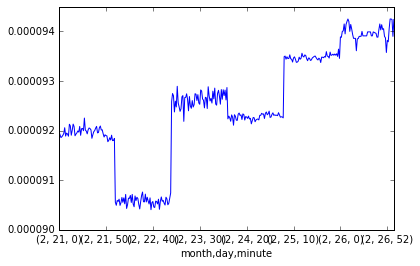

In [4]:
groupby_xrp_bittrex.plot()

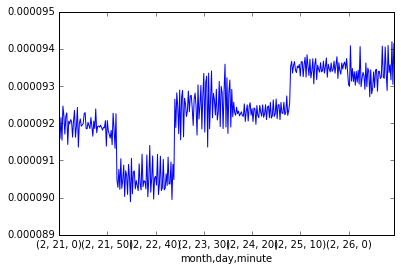

In [5]:
groupby_xrp_bitfinex.plot()

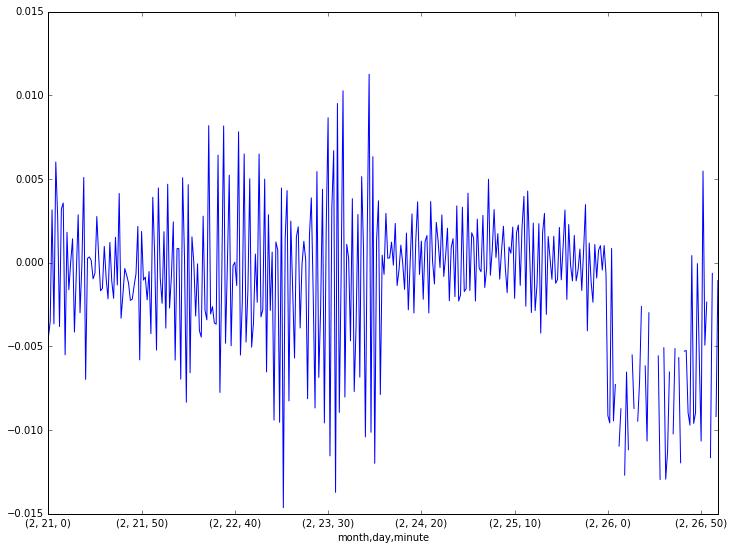

In [23]:
diff

day  minute
21   0        -4.108750e-07
     1        -3.232353e-07
     2         2.906250e-07
     3        -3.344706e-07
     4         5.560000e-07
     5         2.533750e-07
     6        -3.495536e-07
     7         2.966667e-07
     8         3.289216e-07
     9        -5.031111e-07
     10        1.670769e-07
     11       -1.487500e-07
     12        4.000000e-09
     13        1.315294e-07
     14       -3.797059e-07
     15       -6.562500e-08
     16        2.640000e-07
     17       -2.736275e-07
     18       -9.411765e-09
     19        4.706250e-07
     20       -6.367778e-07
     21        2.333333e-08
     22        3.171429e-08
     23        1.300000e-08
     24       -8.882353e-08
     25       -5.733333e-08
     26        2.546429e-07
     27        3.400000e-08
     28       -1.540476e-07
     29       -1.408333e-07
                   ...     
26   30       -4.750000e-07
     31       -1.200000e-06
     32       -1.050000e-06
     33       -6.100000e-07
     34 

In [10]:
df_xrp_bittrex.head()

,id,exchange_name,pair_name,timestamp,best_ask,1,2,3,4,5,6,7,8,9,10,12_5,15,17_5,20
timestamp,,,,,,,,,,,,,,,,,,,
2018-02-21 09:41:23.821,163,bittrex,XRP/BTC,1519206083821,0.00009209,87280.1,93994.5,121661,0,0,0,0,0,0,0,0,0,0,0
2018-02-21 09:43:23.870,297,bittrex,XRP/BTC,1519206203870,0.000092,50835.5,108586,136388,0,0,0,0,0,0,0,0,0,0,0
2018-02-21 09:44:15.042,371,bittrex,XRP/BTC,1519206255042,0.00009186,29315.8,111760,137415,0,0,0,0,0,0,0,0,0,0,0
2018-02-21 09:45:03.934,429,bittrex,XRP/BTC,1519206303934,0.00009199,60161.2,117090,145643,0,0,0,0,0,0,0,0,0,0,0
2018-02-21 09:45:54.183,498,bittrex,XRP/BTC,1519206354183,0.00009184,53279.9,117705,143361,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df_xrp_bittrex["best_ask"]

timestamp
2018-02-21 09:41:23.821    0.00009209
2018-02-21 09:43:23.870      0.000092
2018-02-21 09:44:15.042    0.00009186
2018-02-21 09:45:03.934    0.00009199
2018-02-21 09:45:54.183    0.00009184
2018-02-21 09:46:43.335    0.00009181
2018-02-21 09:47:32.985    0.00009162
2018-02-21 09:48:30.095    0.00009181
2018-02-21 09:49:20.529     0.0000918
2018-02-21 09:50:08.824     0.0000916
2018-02-21 09:52:16.313    0.00009135
2018-02-21 09:53:03.463    0.00009159
2018-02-21 09:55:59.609    0.00009148
2018-02-21 09:56:47.439    0.00009137
2018-02-21 09:57:36.482    0.00009163
2018-02-21 09:59:34.267    0.00009135
2018-02-21 10:00:22.892    0.00009135
2018-02-21 10:01:19.131    0.00009135
2018-02-21 10:02:12.834    0.00009113
2018-02-21 10:03:02.712    0.00009135
2018-02-21 10:04:47.852    0.00009128
2018-02-21 10:05:41.509    0.00009155
2018-02-21 10:06:35.068    0.00009145
2018-02-21 10:08:43.875    0.00009202
2018-02-21 10:09:40.877    0.00009202
2018-02-21 10:10:29.219     0.0000919
20

In [17]:
df_xrp_bitfinex["best_ask"]

timestamp
2018-02-21 09:40:35.849    0.00009193
2018-02-21 09:43:25.964    0.00009177
2018-02-21 09:46:15.735     0.0000918
2018-02-21 09:49:04.909    0.00009168
2018-02-21 09:51:46.587    0.00009163
2018-02-21 09:54:35.030    0.00009157
2018-02-21 09:57:19.548    0.00009157
2018-02-21 10:00:07.615    0.00009158
2018-02-21 10:02:51.305    0.00009157
2018-02-21 10:06:36.343    0.00009172
2018-02-21 10:09:22.108    0.00009193
2018-02-21 10:12:05.328    0.00009207
2018-02-21 10:14:48.447    0.00009197
2018-02-21 10:17:40.301    0.00009194
2018-02-21 10:20:22.426    0.00009183
2018-02-21 10:24:15.441    0.00009217
2018-02-21 10:26:59.757     0.0000923
2018-02-21 10:29:45.606    0.00009222
2018-02-21 10:32:27.665    0.00009244
2018-02-21 10:35:20.379     0.0000923
2018-02-21 10:38:02.679    0.00009218
2018-02-21 10:40:57.682    0.00009223
2018-02-21 10:43:42.898     0.0000925
2018-02-21 10:46:26.193     0.0000923
2018-02-21 10:49:15.646    0.00009232
2018-02-21 10:51:57.685    0.00009232
20

In [20]:
df[df["exchange_name"] == "bittrex"]["price"]

0          0.000006
1          0.000006
2          0.000006
3          0.000006
4          0.000006
5          0.000006
6          0.000006
7          0.000006
8          0.000006
9          0.000006
10         0.000006
11         0.000006
12         0.000006
13         0.000006
14         0.000006
15         0.000006
16         0.000006
17         0.000006
18         0.000006
19         0.000006
20         0.000006
21         0.000006
22         0.000006
23         0.000006
24         0.000006
25         0.000006
26         0.000006
27         0.000006
28         0.000006
29         0.000006
             ...   
1871444    0.000006
1871445    0.000006
1871446    0.000006
1871447    0.000006
1871448    0.000006
1871449    0.000006
1871450    0.000006
1871451    0.000006
1871452    0.000006
1871453    0.000006
1871454    0.000006
1871455    0.000006
1871456    0.000006
1871457    0.000006
1871458    0.000006
1871459    0.000006
1871460    0.000006
1871461    0.000006
1871462    0.000006


In [22]:
df_xrp = pd.read_csv("../XRP.csv", names = ["id","exchange_name","trade_id","timestamp","price","amount","buy_sell_type","pair_name"])

In [25]:
df_xrp.dtypes

id                 int64
exchange_name     object
trade_id           int64
timestamp          int64
price            float64
amount           float64
buy_sell_type      int64
pair_name         object
dtype: object

array(['bittrex', 'bitfinex'], dtype=object)

In [50]:
pd.to_datetime(df_xrp_bittrex["timestamp"],unit='ms').dt.minute 

timestamp
2018-02-21 08:41:11    41
2018-02-21 08:41:00    41
2018-02-21 08:41:00    41
2018-02-21 08:40:58    40
2018-02-21 08:40:34    40
2018-02-21 08:40:33    40
2018-02-21 08:40:20    40
2018-02-21 08:40:04    40
2018-02-21 08:40:03    40
2018-02-21 08:40:03    40
2018-02-21 08:39:27    39
2018-02-21 08:39:27    39
2018-02-21 08:39:27    39
2018-02-21 08:39:27    39
2018-02-21 08:39:27    39
2018-02-21 08:38:25    38
2018-02-21 08:38:23    38
2018-02-21 08:38:20    38
2018-02-21 08:38:03    38
2018-02-21 08:38:03    38
2018-02-21 08:36:35    36
2018-02-21 08:36:20    36
2018-02-21 08:36:20    36
2018-02-21 08:36:13    36
2018-02-21 08:36:13    36
2018-02-21 08:36:11    36
2018-02-21 08:36:11    36
2018-02-21 08:36:11    36
2018-02-21 08:36:11    36
2018-02-21 08:35:37    35
                       ..
2018-02-26 03:41:04    41
2018-02-26 03:41:02    41
2018-02-26 03:41:00    41
2018-02-26 03:40:54    40
2018-02-26 03:40:52    40
2018-02-26 03:40:51    40
2018-02-26 03:40:51    40
20

In [46]:
df_xrp_bitfinex["price"].head()

timestamp
2018-02-21 08:41:28    0.00009155
2018-02-21 08:41:27    0.00009157
2018-02-21 08:40:36    0.00009168
2018-02-21 08:40:36    0.00009163
2018-02-21 08:40:36    0.00009162
Name: price, dtype: object

In [45]:
df_xrp_bittrex["price"] .head()

timestamp
2018-02-21 08:41:11    0.00009138
2018-02-21 08:41:00    0.00009138
2018-02-21 08:41:00    0.00009138
2018-02-21 08:40:58    0.00009127
2018-02-21 08:40:34    0.00009139
Name: price, dtype: object

In [33]:
pd.to_datetime(df_xrp_bittrex["timestamp"])

OverflowError: signed integer is greater than maximum

,id,exchange_name,trade_id,timestamp,price,amount,buy_sell_type,pair_name
0,602,bittrex,103128707,1519202471000,0.00009138,110.81,0,XRP/BTC
1,603,bittrex,103128702,1519202460000,0.00009138,29.4132,0,XRP/BTC
2,604,bittrex,103128700,1519202460000,0.00009138,29.2809,0,XRP/BTC
3,605,bittrex,103128697,1519202458000,0.00009127,460.022,1,XRP/BTC
4,606,bittrex,103128683,1519202434000,0.00009139,109.421,0,XRP/BTC
5,607,bittrex,103128681,1519202433000,0.00009139,25,0,XRP/BTC
6,608,bittrex,103128677,1519202420000,0.00009139,112.657,0,XRP/BTC
7,609,bittrex,103128669,1519202404000,0.00009127,41,1,XRP/BTC
8,610,bittrex,103128666,1519202403000,0.00009127,320.488,1,XRP/BTC
9,611,bittrex,103128665,1519202403000,0.00009139,250,1,XRP/BTC


In [30]:
df_xrp_bittrex["price"]

0         0.00009138
1         0.00009138
2         0.00009138
3         0.00009127
4         0.00009139
5         0.00009139
6         0.00009139
7         0.00009127
8         0.00009127
9         0.00009139
10        0.00009127
11        0.00009138
12        0.00009138
13        0.00009139
14        0.00009139
15        0.00009143
16        0.00009139
17        0.00009139
18        0.00009143
19        0.00009143
20        0.00009144
21        0.00009144
22        0.00009143
23        0.00009139
24        0.00009139
25        0.00009139
26        0.00009139
27        0.00009139
28        0.00009139
29        0.00009139
             ...    
544035     0.0000929
544036    0.00009281
544037     0.0000929
544038     0.0000929
544039    0.00009291
544040     0.0000928
544041    0.00009281
544042    0.00009286
544043    0.00009291
544044    0.00009291
544045    0.00009291
544046    0.00009291
544047    0.00009291
544048    0.00009291
544049    0.00009291
544050    0.00009291
544051    0.0

In [17]:
coincheck = ccxt.coincheck()
zaif = ccxt.zaif()
bitflyer = ccxt.bitflyer()
quoine = ccxt.quoine()
binance = ccxt.binance()
bittrex = ccxt.bittrex()
bitfinex = ccxt.bitfinex()

In [ ]:
CREATE TABLE trades  (
id int NOT NULL AUTO_INCREMENT,
exchange_name text,
pair_name text,
trade_id int,
timestamp BIGINT,
price float,
amount float,
buy_sell_type int,
PRIMARY KEY (`id`)
);

In [1]:
# """
# CREATE TABLE bittrex_trades  (
# id int NOT NULL AUTO_INCREMENT,
# bittrex_trade_id int,
# timestamp datetime,
# price float,
#  amount float,
#  buy_sell_type int,
# PRIMARY KEY (`id`)
# );

# """

    100% |████████████████████████████████| 11.9MB 43kB/s 
  Running setup.py bdist_wheel for mysql-connector-python-rf ... - \ | / done
  Stored in directory: /Users/take/Library/Caches/pip/wheels/bb/53/e4/dced82f8a15f96a8afbe626ebb2939d2901b29e610a97fc1ba
Successfully built mysql-connector-python-rf


In [45]:
from urllib.parse import urlparse
import mysql.connector

url = urlparse('mysql://take@localhost:3306/bitcoin')

conn = mysql.connector.connect(
    host = url.hostname or 'take',
    port = url.port or 3306,
    user = url.username or 'root',
    password = url.password or '',
    database = url.path[1:],
)

In [46]:
conn.is_connected()

True

In [47]:
conn.ping(reconnect=True)

In [48]:
cur = conn.cursor()

In [49]:
cur.execute('SELECT * FROM trades')
cur.fetchall()

[]

In [ ]:
1秒ごとに回す
過去100取引をdictionaryにいれておく
取引所idとtrade idをひいて、かぶっていなければ、insert

In [30]:
# sql_string = "INSERT IGNORE INTO trades (bittrex_trade_id,timestamp,price,amount,buy_sell_type)  \
# SELECT * FROM (SELECT (%s,%s,%s,%s,%s)) AS tmp \
# WHERE NOT EXISTS (  \
#     SELECT bittrex_trade_id FROM bittrex_trades WHERE bittrex_trade_id = %s  \
# ) LIMIT 1;"

In [ ]:
# SELECT * FROM (SELECT (145862691,"2018-02-18T01:50:28.633",0.02052002,2.63045673,1)) AS tmp \
# WHERE NOT EXISTS (  \
#     SELECT bittrex_trade_id FROM bittrex_trades WHERE bittrex_trade_id = 145862691  \
# ) LIMIT 1;

In [65]:
len(bittrex.fetchTrades(pair_name))

100

In [63]:
cur.execute('SELECT * FROM trades')
cur.fetchall()

[(1, 'bittrex', 'LTC/BTC', 145921666, 1518937679000, 0.0206583, 3.2505, 0),
 (2, 'bittrex', 'LTC/BTC', 145921658, 1518937676000, 0.0206583, 0.44959, 1),
 (3, 'bittrex', 'LTC/BTC', 145921638, 1518937660000, 0.0206583, 0.661521, 1),
 (4, 'bittrex', 'LTC/BTC', 145921767, 1518937719000, 0.0207923, 0.220255, 0),
 (5, 'bittrex', 'LTC/BTC', 145921766, 1518937719000, 0.0207923, 0.1381, 0),
 (6, 'bittrex', 'LTC/BTC', 145921765, 1518937719000, 0.0207923, 0.655422, 0),
 (7, 'bittrex', 'LTC/BTC', 145921734, 1518937707000, 0.0206584, 0.655422, 1),
 (8, 'bittrex', 'LTC/BTC', 145921706, 1518937700000, 0.0207923, 0.315146, 0),
 (9, 'bittrex', 'LTC/BTC', 145921705, 1518937700000, 0.0207923, 0.165719, 0),
 (10, 'bittrex', 'LTC/BTC', 145921666, 1518937679000, 0.0206583, 3.2505, 0),
 (11, 'bittrex', 'LTC/BTC', 145921658, 1518937676000, 0.0206583, 0.44959, 1),
 (12, 'bittrex', 'LTC/BTC', 145921638, 1518937660000, 0.0206583, 0.661521, 1),
 (13, 'bittrex', 'LTC/BTC', 145921617, 1518937654000, 0.0207926, 1.47

In [62]:
from time import sleep

pair_name = "LTC/BTC"
bittrex = ccxt.bittrex()
trade_id_set_prev_loop  = set()
while True:
    trades=bittrex.fetchTrades(pair_name)
    print("len(trades)")
    print(len(trades))
    trade_id_set_this_loop  = set()
    for trade in trades:
        
#         print(trade)
        price = trade["price"]
        amount = trade["amount"]
#         datetime = trade["datetime"]
        timestamp = trade["timestamp"]
        trade_id = trade["id"]
        trade_id_set_this_loop.add(trade_id)
        if trade["side"] == "sell":
            side = 1
        elif trade["side"] == "buy":
            side = 0
#         print(amount,datetime,trade_id,side)
        
        # 前回
        if trade_id in trade_id_set_prev_loop:
            sql_string = "INSERT INTO trades \
            (exchange_name,pair_name,trade_id,timestamp,price,amount,buy_sell_type) \
            VALUES (%s,%s,%s,%s,%s,%s,%s)"

            try:
                cur.execute(sql_string, ["bittrex",pair_name,trade_id,timestamp,price,amount,side])
                # cur.execute('INSERT INTO bittrex_trades (bittrex_trade_id,timestamp,price,amount,buy_sell_type) VALUES (%s,%s,%s,%s)', [145862691,"2018-02-18T01:50:28.633",0.02052002,2.63045673,1])
                conn.commit()
            except:

                conn.rollback()
                raise
            

    trade_id_set_prev_loop = trade_id_set_this_loop
    print("aaaa")
    sleep(10)

len(trade)
9
aaaa
len(trade)
9
aaaa


KeyboardInterrupt: 

In [20]:
pair_name = "LTC/BTC"
bitfinex = ccxt.bitfinex({"verbose":True})
bitfinex.fetchTrades(pair_name)

https://api.bitfinex.com/v1/symbols_details GET https://api.bitfinex.com/v1/symbols_details 
Request: {'User-Agent': 'ccxt/1.9.151 (+https://github.com/ccxt-dev/ccxt) Python/3.5.1', 'Accept-Encoding': 'gzip, deflate'} None
GET https://api.bitfinex.com/v1/symbols_details 
Response: Date: Sat, 17 Feb 2018 14:12:15 GMT
Content-Type: application/json; charset=utf-8
Transfer-Encoding: chunked
Connection: close
Set-Cookie: __cfduid=dc2f9b7668a9a3c88e6eda570020606941518876734; expires=Sun, 17-Feb-19 14:12:14 GMT; path=/; domain=.bitfinex.com; HttpOnly
Vary: Accept-Encoding
X-Frame-Options: SAMEORIGIN
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff
ETag: W/"0950e8d04166fc9f49daf97858f8f8ad"
Cache-Control: max-age=0, private, must-revalidate
X-Request-Id: f0fcfd4e-638a-4d2a-af63-4889b7e891fc
X-Runtime: 0.168477
Strict-Transport-Security: max-age=31536000
X-Frame-Options: SAMEORIGIN
Content-Encoding: gzip
Expect-CT: max-age=604800, report-uri="https://report-uri.cloudflare.com/cd

[{'amount': 0.4209,
  'datetime': '2018-02-17T14:12:11.000Z',
  'id': '197542198',
  'info': {'amount': '0.4209',
   'exchange': 'bitfinex',
   'price': '0.021047',
   'tid': 197542198,
   'timestamp': 1518876731,
   'type': 'sell'},
  'price': 0.021047,
  'side': 'sell',
  'symbol': 'LTC/BTC',
  'timestamp': 1518876731000,
  'type': None},
 {'amount': 0.20460532,
  'datetime': '2018-02-17T14:12:11.000Z',
  'id': '197542194',
  'info': {'amount': '0.20460532',
   'exchange': 'bitfinex',
   'price': '0.021046',
   'tid': 197542194,
   'timestamp': 1518876731,
   'type': 'sell'},
  'price': 0.021046,
  'side': 'sell',
  'symbol': 'LTC/BTC',
  'timestamp': 1518876731000,
  'type': None},
 {'amount': 0.42686115,
  'datetime': '2018-02-17T14:11:54.000Z',
  'id': '197542093',
  'info': {'amount': '0.42686115',
   'exchange': 'bitfinex',
   'price': '0.021061',
   'tid': 197542093,
   'timestamp': 1518876714,
   'type': 'buy'},
  'price': 0.021061,
  'side': 'buy',
  'symbol': 'LTC/BTC',
  't

In [16]:
trades

[{'amount': 1.84957611,
  'datetime': '2018-02-18T02:12:07.000Z',
  'id': '145866524',
  'info': {'FillType': 'PARTIAL_FILL',
   'Id': 145866524,
   'OrderType': 'SELL',
   'Price': 0.02055145,
   'Quantity': 1.84957611,
   'TimeStamp': '2018-02-18T02:12:07.263',
   'Total': 0.03801147},
  'price': 0.02055145,
  'side': 'sell',
  'symbol': 'LTC/BTC',
  'timestamp': 1518919927000,
  'type': 'limit'},
 {'amount': 2.40855712,
  'datetime': '2018-02-18T02:12:07.000Z',
  'id': '145866523',
  'info': {'FillType': 'FILL',
   'Id': 145866523,
   'OrderType': 'SELL',
   'Price': 0.02057097,
   'Quantity': 2.40855712,
   'TimeStamp': '2018-02-18T02:12:07.263',
   'Total': 0.04954635},
  'price': 0.02057097,
  'side': 'sell',
  'symbol': 'LTC/BTC',
  'timestamp': 1518919927000,
  'type': 'limit'},
 {'amount': 3.09682417,
  'datetime': '2018-02-18T02:12:06.000Z',
  'id': '145866520',
  'info': {'FillType': 'PARTIAL_FILL',
   'Id': 145866520,
   'OrderType': 'SELL',
   'Price': 0.02057097,
   'Quan

In [ ]:
# binanceででる
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# http://shinespark.hatenablog.com/entry/2015/12/06/100000

In [8]:
# TODO 今、集計された取引履歴になってるから aggTrades
# 集計されていない取引履歴にする historicalTrades
# historicalTradesは{"code":-2014,"msg":"API-key format invalid."}になる
# kusa_symbol_id = 
binance.fetchTrades("LTC/BTC")

[{'amount': 0.98,
  'cost': 0.020625079999999997,
  'datetime': '2018-02-17T13:28:10.000Z',
  'fee': None,
  'id': '6817939',
  'info': {'M': True,
   'T': 1518874089581,
   'a': 6817939,
   'f': 7653035,
   'l': 7653036,
   'm': True,
   'p': '0.02104600',
   'q': '0.98000000'},
  'order': None,
  'price': 0.021046,
  'side': 'buy',
  'symbol': 'LTC/BTC',
  'timestamp': 1518874089581,
  'type': None},
 {'amount': 0.71,
  'cost': 0.014942659999999998,
  'datetime': '2018-02-17T13:28:10.000Z',
  'fee': None,
  'id': '6817940',
  'info': {'M': True,
   'T': 1518874089616,
   'a': 6817940,
   'f': 7653037,
   'l': 7653037,
   'm': False,
   'p': '0.02104600',
   'q': '0.71000000'},
  'order': None,
  'price': 0.021046,
  'side': 'sell',
  'symbol': 'LTC/BTC',
  'timestamp': 1518874089616,
  'type': None},
 {'amount': 0.17,
  'cost': 0.0035776500000000004,
  'datetime': '2018-02-17T13:28:21.000Z',
  'fee': None,
  'id': '6817941',
  'info': {'M': True,
   'T': 1518874101375,
   'a': 681794

In [3]:
def create_df_trade(trade_dict, csv_name):
    dictlist = []
    for key, value in trade_dict.items():
    #     print(key,value)
        dictlist.append(value)

    trade_list = []
    for key, trade in trade_dict.items():
        trade_list.append(["coincheck",trade["id"],trade["created_at"],trade["amount"],trade["order_type"],trade["rate"]])
    df_trade=pd.DataFrame(trade_list)
    df_trade.columns=["coincheck","id","created_at","amount","order_type","rate"]
    df_trade["created_at"]=pd.to_datetime(df_trade["created_at"])
    df_trade["amount"]=df_trade["amount"].convert_objects(convert_numeric=True)

    df_trade.index=df_trade["created_at"]
    df_trade=df_trade.sort_values('created_at')
    df_trade_amount=df_trade[["amount"]]
    
    df_trade.to_csv(csv_name+datetime.now().strftime('%Y-%m-%d')+".csv")

In [ ]:
i = 0
trade_dict={}
name = "coincheck"
while True:
    try:
        i += 1

        trades=coincheck.fetchTrades("BTC/JPY")
        for trade in trades:
            trade_dict[trade["id"]] = trade
        #     print(trade)
        #     trade_list.append(["coincheck",trade["id"],trade["created_at"],trade["amount"],trade["order_type"],trade["rate"]])
    except:
        print('Failed to access API')
        with open(name+"my_error.log", "w") as f:
            f.write(datetime.now().strftime('%Y-%m-%d')+'Failed to access API')
    
    #     書き込み
    try:
        if i %1000 == 0:
            print(i)
            create_df_trade(trade_dict, name)
            with open(name+'_log.pickle', mode='wb') as f:
                pickle.dump(trade_dict, f)
            # TODO:trade_dictが重そうやったらtrade_dict,df_tradeを初期化する
    except:
        print('Failed to write')
        with open(name+"my_error.log", "w") as f:
            f.write(datetime.now().strftime('%Y-%m-%d')+'Failed to write')

Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to acc

In [35]:
with open('coincheck_log.pickle', mode='wb') as f:
    pickle.dump(trade_dict, f)

In [36]:
len(trade_dict)

5287

In [4]:
def create_df_trade(trade_dict):
    dictlist = []
    for key, value in trade_dict.items():
    #     print(key,value)
        dictlist.append(value)

    trade_list = []
    for key, trade in trade_dict.items():
        trade_list.append(["coincheck",trade["id"],trade["created_at"],trade["amount"],trade["order_type"],trade["rate"]])
    df_trade=pd.DataFrame(trade_list)
    df_trade.columns=["coincheck","id","created_at","amount","order_type","rate"]
    df_trade["created_at"]=pd.to_datetime(df_trade["created_at"])
    df_trade["amount"]=df_trade["amount"].convert_objects(convert_numeric=True)

    df_trade.index=df_trade["created_at"]
    df_trade=df_trade.sort_values('created_at')
    df_trade_amount=df_trade[["amount"]]
    
    df_trade.to_csv("coincheck_0827.csv")

/Users/take/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [39]:
df_trade.head()

,coincheck,id,created_at,amount,order_type,rate
created_at,,,,,,
2017-08-26 06:21:30,coincheck,16480030,2017-08-26 06:21:30,0.0078,sell,472677
2017-08-26 06:21:30,coincheck,16480029,2017-08-26 06:21:30,0.0051,sell,472730
2017-08-26 06:21:35,coincheck,16480032,2017-08-26 06:21:35,0.0020,sell,472686
2017-08-26 06:21:35,coincheck,16480031,2017-08-26 06:21:35,0.0270,sell,472698
2017-08-26 06:21:38,coincheck,16480033,2017-08-26 06:21:38,0.0100,buy,472754


In [40]:
df_trade.to_csv("coincheck_0826_2.csv")

In [41]:
df_summary = df_trade_amount.groupby(pd.TimeGrouper(freq="min")).aggregate(np.sum)[1:]
df_summary.head()

,amount
created_at,
2017-08-26 06:22:00,0.880368
2017-08-26 06:23:00,2.464232
2017-08-26 06:24:00,11.270953
2017-08-26 06:25:00,10.314184
2017-08-26 06:26:00,14.630704


AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

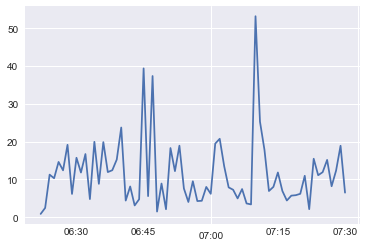

In [42]:
df_summary['amount'].plot()